**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [4]:
import numpy as np
import pandas as pd#my!
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [ ]:
def predict(self, X):
        y = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            dif = np.copy(self.X)
            dist = np.sum(np.square(dif - X[i]), axis=1)
            ind = np.argsort(dist)
            for j in range(self.n_neighbors):
                y[i] += self.y[ind[j]]
            y[i] = int(round(y[i] / self.n_neighbors))
        return y

In [132]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=2, algorithm='brute'):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
        self.classes = np.unique(y)
        self.classes = np.sort(self.classes)
        self.y = np.searchsorted(self.classes, self.y)

    def predict(self, X):
        y = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            y[i] = int(round(np.sum(self.y[np.argsort(np.sum(np.square(self.X - X[i]), axis=1))[0:self.n_neighbors]]) / self.n_neighbors))
        return y

    def predict_proba(self, X):
        y = np.zeros((X.shape[0], self.classes.size))
        for i in range(X.shape[0]):
            dif = np.copy(self.X)
            dist = np.sum(np.square(dif - X[i]), axis=1)
            ind = np.argsort(dist)
            for j in range(self.n_neighbors):
                y[i][self.y[ind[j]]] += 1. / self.n_neighbors
        return y

    def score(self, X, y):
        y1 = self.predict(X)
        y1 = np.equal(y1, y)
        z = np.sum(y1) / y.size
        return z

**IRIS**

In [133]:
iris = datasets.load_iris()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [135]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [136]:
%time clf.fit(X_train, y_train)

CPU times: user 516 µs, sys: 201 µs, total: 717 µs
Wall time: 572 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [137]:
%time my_clf.fit(X_train, y_train)

CPU times: user 250 µs, sys: 0 ns, total: 250 µs
Wall time: 155 µs


In [138]:
%time clf.predict(X_test)

CPU times: user 3.19 ms, sys: 0 ns, total: 3.19 ms
Wall time: 2.01 ms


array([0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1])

In [139]:
%time my_clf.predict(X_test)

CPU times: user 1.53 ms, sys: 95 µs, total: 1.63 ms
Wall time: 1.16 ms


array([0, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1])

In [140]:
%time clf.predict_proba(X_test)

CPU times: user 1.57 ms, sys: 0 ns, total: 1.57 ms
Wall time: 1.1 ms


array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [14]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 2.27 ms, total: 2.27 ms
Wall time: 1.45 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [15]:
clf.score(X_test, y_test)

0.9333333333333333

In [16]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

12

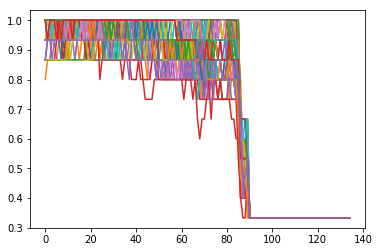

In [77]:
#%%pycodestyle
n = 20
best = np.zeros(n, dtype=np.int)
for j in range(n):
    score = np.ones(y_train.size, dtype=np.int)
    while np.sum(score) > 0:
        best[j] = np.nonzero(score)[0][0] + 1
        X_train, X_test, y_train, y_test = \
            train_test_split(iris.data,
                             iris.target,
                             test_size=0.1,
                             stratify=iris.target)
        y = np.zeros(y_train.size)
        for i in range(y_train.size):
            my_clf = MyKNeighborsClassifier(n_neighbors=i+1, algorithm='brute')
            my_clf.fit(X_train, y_train)
            y[i] = my_clf.score(X_test, y_test)
            if y[i] != 1:
                score[i] = 0
        plt.plot(y)
args = np.argsort(np.bincount(best))
args = np.flip(args)
the_best = args[0]
if the_best == 1:
    the_best = args[1]
the_best

**MNIST**

In [80]:
mnist = fetch_openml('mnist_784')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [84]:
%time clf.fit(X_train, y_train)

CPU times: user 111 ms, sys: 4.03 ms, total: 115 ms
Wall time: 114 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [85]:
%time my_clf.fit(X_train, y_train)

CPU times: user 235 ms, sys: 132 ms, total: 367 ms
Wall time: 91.9 ms


In [86]:
%time clf.predict(X_test)

CPU times: user 3.96 s, sys: 232 ms, total: 4.19 s
Wall time: 1.33 s


array(['7', '8', '1', '2', '3', '1', '7', '9', '4', '7', '0', '9', '4',
       '5', '5', '2', '3', '3', '6', '5', '6', '1', '5', '0', '1', '1',
       '0', '2', '2', '0', '3', '3', '2', '2', '8', '2', '9', '5', '9',
       '8', '4', '7', '1', '3', '8', '8', '6', '7', '4', '5', '1', '5',
       '4', '8', '4', '1', '1', '1', '7', '4', '7', '1', '1', '9', '9',
       '8', '9', '6', '4', '1', '3', '1', '9', '2', '0', '5', '8', '4',
       '0', '7', '1', '1', '1', '6', '6', '1', '5', '7', '5', '5', '1',
       '9', '1', '6', '4', '3', '3', '7', '0', '7', '6', '5', '2', '3',
       '0', '1', '5', '2', '9', '8', '1', '2', '9', '6', '6', '5', '4',
       '0', '6', '2', '2', '1', '3', '2', '5', '7', '2', '8', '3', '2',
       '4', '9', '8', '6', '3', '4', '7', '7', '5', '7', '2', '1', '3',
       '8', '4', '4', '6', '1', '9', '0', '7', '1', '0', '0', '7', '3',
       '3', '7', '7', '8', '3', '4', '6', '5', '8', '5', '1', '2', '3',
       '3', '6', '1', '5', '6', '4', '3', '3', '8', '2', '1', '6

In [87]:
%time my_clf.predict(X_test)

CPU times: user 10min 9s, sys: 4min 22s, total: 14min 31s
Wall time: 3min 38s


array([7, 8, 1, 2, 3, 1, 7, 9, 4, 7, 0, 9, 4, 6, 5, 2, 3, 3, 6, 5, 6, 1,
       5, 0, 1, 1, 0, 2, 2, 0, 3, 3, 2, 2, 8, 2, 9, 5, 9, 8, 4, 7, 1, 3,
       8, 8, 6, 7, 4, 5, 1, 5, 4, 8, 4, 1, 1, 1, 7, 4, 7, 1, 1, 9, 9, 8,
       9, 6, 4, 1, 3, 3, 9, 2, 0, 5, 8, 4, 0, 7, 1, 1, 1, 6, 6, 1, 5, 7,
       5, 5, 1, 9, 1, 6, 4, 3, 3, 7, 0, 7, 6, 5, 2, 3, 0, 1, 5, 2, 9, 8,
       1, 2, 9, 6, 6, 5, 4, 0, 6, 2, 2, 1, 3, 2, 5, 7, 2, 8, 3, 2, 6, 9,
       8, 6, 3, 6, 7, 7, 5, 7, 2, 1, 3, 8, 4, 4, 6, 1, 9, 0, 7, 1, 0, 0,
       7, 3, 3, 7, 7, 8, 3, 4, 6, 5, 8, 5, 1, 2, 3, 3, 6, 1, 5, 6, 6, 3,
       4, 8, 2, 1, 6, 3, 5, 4, 0, 0, 2, 7, 0, 0, 1, 1, 2, 4, 4, 4, 7, 9,
       8, 0, 0, 1, 9, 4, 4, 9, 1, 8, 1, 6, 8, 3, 9, 3, 7, 0, 6, 9, 4, 1,
       9, 4, 5, 5, 4, 7, 2, 8, 7, 4, 7, 6, 0, 7, 5, 9, 7, 4, 9, 4, 4, 4,
       3, 3, 4, 8, 0, 8, 4, 7, 6, 6, 2, 9, 7, 5, 9, 7, 6, 7, 0, 5, 1, 4,
       5, 8, 0, 2, 2, 5, 7, 9, 3, 6, 5, 5, 5, 2, 2, 1, 0, 0, 4, 5, 0, 2,
       3, 5, 0, 7, 5, 9, 9, 0, 8, 7, 2, 9, 3, 7, 4,

In [88]:
%time clf.predict_proba(X_test)

CPU times: user 3.95 s, sys: 220 ms, total: 4.17 s
Wall time: 1.31 s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [89]:
%time my_clf.predict_proba(X_test)

CPU times: user 10min 5s, sys: 4min 22s, total: 14min 27s
Wall time: 3min 37s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [90]:
clf.score(X_test, y_test)

0.9628571428571429

In [91]:
my_clf.score(X_test, y_test)

0.0

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin